In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from graph_format import *

means_data = pd.read_csv("Data/mean_matrix.csv")

wages = means_data[means_data["alder"] <= 60]["hourly_salary_plsats_Mean"].to_numpy()
hours = means_data[means_data["alder"] <= 60]["yearly_hours_Mean"].to_numpy() / 1924

variance_data = pd.read_csv("Data/variance_matrix_30.csv")
variance_wage = variance_data[variance_data["_NAME_"] == "hourly_salary_plsats"]["hourly_salary_plsats"]

In [2]:
# def sum_hours(t, hours):
#     total = 0
#     for i in range(t):
#         total += (1) ** i * hours[t - i - 1]
#     return total

# def objective_function(params, wages, hours):
#     k0, beta1, beta2, beta3 = params
#     total_error = 0
#     for t in range(len(wages)):
#         error_mean = (
#             np.log(wages[t])
#             - beta1 * (1) ** t * k0
#             - beta1 * (sum_hours(t, hours))
#             - beta2 * t
#             - beta3 * t**2
#         )

#         total_error += error_mean **2
#     return total_error

# initial_guess = [150, 0.036698, 0.02, -0.000651]
# bounds = [(0, 500), (0, 1), (0, 1), (-10, 0)]

# def random_initial_guess(bounds):
#     # np.random.seed(1)
#     return [np.random.uniform(low, high) for low, high in bounds]

# initial_guess = random_initial_guess(bounds)


# result = minimize(
#     objective_function,
#     x0=initial_guess,
#     args=(wages, hours),
#     method="nelder-mead",
#     bounds=bounds,
#     tol=1e-12,
#     options={
#         "maxiter": 30000,  # Maximum iterations
#         "xatol": 1e-9,
#         "fatol": 1e-9, 
#         "disp": True
#     }
# )


# estimated_params = result.x
# k0_est, beta1_est, beta2_est, beta3_est = estimated_params

# results_dict = {
#     "Parameter": ["par.k_0 =", "par.beta_1 =", "par.beta_2 =", "par.beta_3 ="],
#     "Estimated Value": [k0_est, beta1_est, beta2_est, beta3_est],
# }

# results_df = pd.DataFrame(results_dict)

# print(results_df)

# print(result.fun)

In [3]:
# def simulate(params, wages, hours):
#     k0, beta1, beta2, beta3 = params
#     ln_wage = np.zeros(len(wages))
#     for t in range(len(wages)):
#         ln_wage[t] = (
#             beta1 * (1) ** t * k0
#             + beta1 * (sum_hours(t, hours))
#             + beta2 * t
#             + beta3 * t**2
#         )

#     return ln_wage


# ln_wage = simulate(estimated_params, wages, hours)


# import matplotlib.pyplot as plt

# def plot_ln_wage(ln_wage, man_hourly_salary, title="Log Wage Simulation vs Real Data", 
#                  xlabel="Time (Years)", ylabel="ln(Wage)"):
#     plt.figure(figsize=(8, 5))
    
#     # Convert real hourly salary to log scale for comparison
#     ln_real_wage = np.log(man_hourly_salary)
    
#     # Plot simulated ln_wage
#     plt.plot(ln_wage, marker="o", linestyle="-", label="Simulated ln(Wage)", color='b')
    
#     # Plot real ln(wage)
#     plt.plot(ln_real_wage, marker="s", linestyle="--", label="Real ln(Wage)", color='r')
    
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.title(title)
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Example usage
# plot_ln_wage(ln_wage, wages)

In [19]:
def sum_hours(t, hours, delta):
    total = 0
    for i in range(t):
        total += (1 - delta) ** i * hours[t - i - 1]
    return total

def objective_function(params, wages, hours):
    w, k0, beta1, beta2, delta, k0_var = params
    total_error = 0
    for t in range(len(wages)):
        error_mean = (
            np.log(wages[t])
            - np.log(w)
            - beta1 * (1 - delta) ** t * k0
            - beta1 * (sum_hours(t, hours, delta))
            - beta2 * t**2
        )

        error_var = (
            variance_wage - (w**2) * (np.exp((beta1**2) * k0_var**2) - 1) * np.exp((2 * beta1 * k0) + beta1**2 * k0_var**2)
        )
        total_error += error_mean **2 + (error_var / 100) ** 2
    return total_error

initial_guess = [126.442773, 11.303549, 0.061654, -0.000375, 0.035881, 4.392646]
bounds = [(130, 140), (10, 12), (0.03, 0.08), (-0.0005, 0), (0, 0.080), (0, 10)]

def random_initial_guess(bounds):
    # np.random.seed(1)
    return [np.random.uniform(low, high) for low, high in bounds]

# initial_guess = random_initial_guess(bounds)


result = minimize(
    objective_function,
    x0=initial_guess,
    args=(wages, hours),
    method="nelder-mead",
    bounds=bounds,
    tol=1e-9,
    options={
        "maxiter": 30000,  # Maximum iterations
        "xatol": 1e-9,
        "fatol": 1e-9, 
        "disp": True
    }
)

estimated_params = result.x
w_est, k0_est, beta1_est, beta2_est, delta_est, k0_var_est = estimated_params

results_dict = {
    "Parameter": ["par.w_0 =", "par.k_0 =", "par.beta_1 =", "par.beta_2 =", "par.delta =", "par.k_0_var ="],
    "Estimated Value": [w_est, k0_est, beta1_est, beta2_est, delta_est, k0_var_est],
}

results_df = pd.DataFrame(results_dict)

print(results_df)

print(result.fun)

C:\Users\Peter\AppData\Local\Temp\ipykernel_1528\1601627982.py:35: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(


Optimization terminated successfully.
         Current function value: 0.000831
         Iterations: 1423
         Function evaluations: 2246
       Parameter  Estimated Value
0      par.w_0 =       136.083656
1      par.k_0 =        11.140278
2   par.beta_1 =         0.050859
3   par.beta_2 =        -0.000456
4    par.delta =         0.027943
5  par.k_0_var =         5.084171
0.0008306402343524903


In [20]:
def simulate(params, wages, hours):
    w, k0, beta1, beta2, delta, k0_var = params
    ln_wage = np.zeros(len(wages))
    for t in range(len(wages)):
        ln_wage[t] = (
            np.log(w)
            + beta1 * (1 - delta) ** t * k0
            + beta1 * (sum_hours(t, hours, delta))
            + beta2 * t**2
        )

    return ln_wage


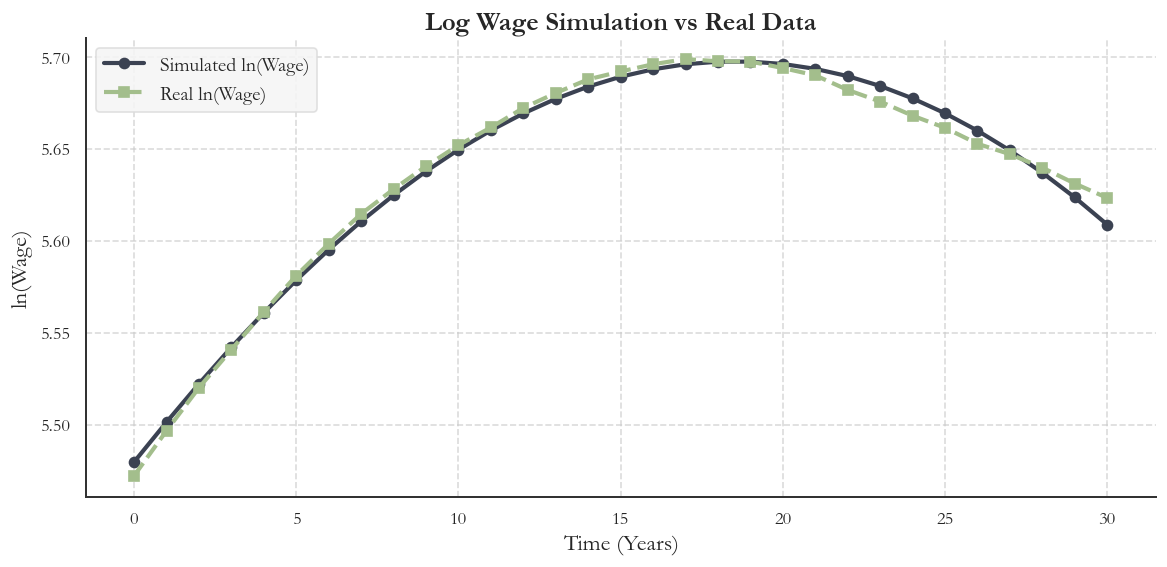

In [21]:
ln_wage = simulate(estimated_params, wages, hours)
plot_ln_wage(ln_wage, wages, save_title="ln_wage_simulation.png")
